# Define the nodes, elements, Node_connected_array(NCA)

[[0. 0. 0.]
 [1. 0. 2.]
 [2. 1. 2.]
 [3. 0. 1.]
 [4. 1. 1.]
 [5. 2. 1.]
 [6. 0. 0.]
 [7. 1. 0.]
 [8. 2. 0.]]
[[0 0 0 0 0]
 [1 1 3 2 1]
 [2 3 4 2 2]
 [3 7 4 3 2]
 [4 3 6 7 1]
 [5 5 4 7 2]
 [6 7 8 5 1]]
Number of node = 8, Number of elements = 6 and Number of different material = 2


array([[0.e+00, 0.e+00, 0.e+00],
       [1.e+00, 1.e+11, 3.e-01],
       [2.e+00, 2.e+11, 2.e-01]], dtype=float32)

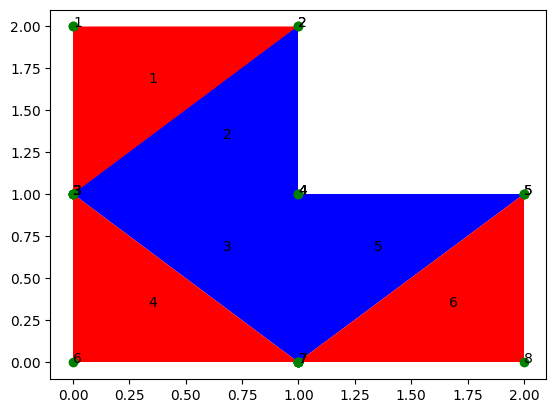

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import copy

#load the required data
coord = np.loadtxt("./Coord.txt", dtype="float32", comments="#", ndmin=2)
NCA = np.loadtxt("./NCA.txt", dtype="int16", comments="#", ndmin=2)
mat_data = np.loadtxt("./MAT_DATA.txt", dtype="float32", comments="#", ndmin=2)
print(coord)
print(NCA)

#define problem type
#problem_type = input("Press 11 > \n press 12 > \n press 13 \n press 21 > plane stress \n press 22 > plane strain n press 3 > for 3-D")
problem_type = 21

thickness = 1

#verify the given data
Num_nodes = coord.shape[0]-1
Num_elements = NCA.shape[0]-1
Num_mats = mat_data.shape[0]-1
print("Number of node = {}, Number of elements = {} and Number of different material = {}".format(Num_nodes,Num_elements,Num_mats))

for elem_idx in range(1,Num_elements+1):
    N1 = NCA[elem_idx][1]
    N2 = NCA[elem_idx][2]
    N3 = NCA[elem_idx][3]

    X1N1 = coord[N1][1]
    X1N2 = coord[N2][1]
    X1N3 = coord[N3][1]
    X2N1 = coord[N1][2]
    X2N2 = coord[N2][2]
    X2N3 = coord[N3][2]

    X1 = [X1N1,X1N2,X1N3,X1N1]
    X2 = [X2N1,X2N2,X2N3,X2N1]

    if NCA[elem_idx][4]== 1:
        plt.fill(X1,X2,facecolor = "red")
    elif NCA[elem_idx][4] == 2:
        plt.fill(X1,X2,facecolor = "blue")
    X1CG = (X1N1+X1N2+X1N3)/3.0
    X2CG = (X2N1+X2N2+X2N3)/3.0
    plt.scatter(X1,X2,color = "green")
    plt.text(X1CG,X2CG,elem_idx)
    plt.text(X1N1,X2N1,N1)
    plt.text(X1N2,X2N2,N2)
    plt.text(X1N3,X2N3,N3)
mat_data

# Generation of D matrix for each element

In [7]:
#D-martix
D_store = []
for elem_idx in range(1,Num_elements+1):
    mat_num = NCA[elem_idx][4]
    E = mat_data[mat_num][1]
    print(E)
    PR = mat_data[mat_num][2]
    print(PR)

    if problem_type == 21:
        #print("For plane stress condition, D matrix = ")
        const1 = E/(1-PR**2)
        D = np.multiply([[1,PR,0],[PR,1,0],[0,0,(1-PR)/2]],const1)
    elif problem_type == 22:
        #print("For plane strain condition, D martix = ")
        const2 = E/((1+PR)*(1-2*PR))
        D = np.multiply([[1-PR,PR,0],[PR,1-PR,0],[0,0,((1-2*PR)/2)]],const2)
    else:
        print("Problem type is not defined. Please, check once again.")
    print("D matrix for element {} = \n{}\n".format(elem_idx,D))
    D_store.append(D)
print(np.shape(D_store))
#D matrix > There are only 2 types.

100000000000.0
0.3
D matrix for element 1 = 
[[1.09890109e+11 3.29670339e+10 0.00000000e+00]
 [3.29670339e+10 1.09890109e+11 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.84615373e+10]]

200000000000.0
0.2
D matrix for element 2 = 
[[2.08333329e+11 4.16666665e+10 0.00000000e+00]
 [4.16666665e+10 2.08333329e+11 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.33333314e+10]]

200000000000.0
0.2
D matrix for element 3 = 
[[2.08333329e+11 4.16666665e+10 0.00000000e+00]
 [4.16666665e+10 2.08333329e+11 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.33333314e+10]]

100000000000.0
0.3
D matrix for element 4 = 
[[1.09890109e+11 3.29670339e+10 0.00000000e+00]
 [3.29670339e+10 1.09890109e+11 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.84615373e+10]]

200000000000.0
0.2
D matrix for element 5 = 
[[2.08333329e+11 4.16666665e+10 0.00000000e+00]
 [4.16666665e+10 2.08333329e+11 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.33333314e+10]]

100000000000.0
0.3
D matrix for element 6 = 


# Generation of B matrix for each element & make global stiffness matrix out of element matrix

In [8]:
problem_type

21

In [9]:
DOF_PN = 2 #DOF per node = 2; X1 and X2
Num_nodes=8
Total_DOF = DOF_PN*Num_nodes
#print("Total degrees of freedom = {}".format(Total_DOF))
GSTIFF = np.zeros([Total_DOF,Total_DOF])
#print("Global stifness matrix = \n{}\n".format(GSTIFF))
#print("Force vector = {}".format(F))

#B-matrix
B_store = []
for elem_idx in range(1,Num_elements+1):
    N1 = NCA[elem_idx,1]
    N2 = NCA[elem_idx,2]
    N3 = NCA[elem_idx,3]
    #print(N1,N2,N3)
    X1N1 = coord[N1,1]
    X1N2 = coord[N2,1]
    X1N3 = coord[N3,1]
    X2N1 = coord[N1,2]
    X2N2 = coord[N2,2]
    X2N3 = coord[N3,2] 

    two_delta_matrix = [[1,X1N1,X2N1],[1,X1N2,X2N2],[1,X1N3,X2N3]]
    two_delta = np.linalg.det(two_delta_matrix)
    #print(two_delta)

    b1 = X2N2-X2N3
    b2 = X2N3-X2N1
    b3 = X2N1-X2N2
    v1 = X1N3-X1N2
    v2 = X1N1-X1N3
    v3 = X1N2-X1N1

    B = [[b1,0,b2,0,b3,0],[0,v1,0,v2,0,v3],[v1,b1,v2,b2,v3,b3]]
    B_store.append(B)
    #print(B)
    ESTIFF = np.transpose(B)@D_store[elem_idx-1]@B*(two_delta/2)*thickness
    
    col_idx = [[2*N1-2,2*N1-1,2*N2-2,2*N2-1,2*N3-2,2*N3-1]]
    row_idx = np.transpose(col_idx)

    GSTIFF[row_idx,col_idx] = GSTIFF[row_idx,col_idx]+ESTIFF
    #print(GSTIFF)
    print(ESTIFF)
#print(D)
#print(B)  
#print(np.shape(GSTIFF),np.linalg.det(GSTIFF))
#print(np.shape(B_store))
#np.matmul(np.matmul(np.transpose(B),D_store[elem_idx-1]),B)

[[ 7.41758229e+10 -3.57142856e+10 -1.92307687e+10  1.64835169e+10
  -5.49450543e+10  1.92307687e+10]
 [-3.57142856e+10  7.41758229e+10  1.92307687e+10 -5.49450543e+10
   1.64835169e+10 -1.92307687e+10]
 [-1.92307687e+10  1.92307687e+10  1.92307687e+10  0.00000000e+00
   0.00000000e+00 -1.92307687e+10]
 [ 1.64835169e+10 -5.49450543e+10  0.00000000e+00  5.49450543e+10
  -1.64835169e+10  0.00000000e+00]
 [-5.49450543e+10  1.64835169e+10  0.00000000e+00 -1.64835169e+10
   5.49450543e+10  0.00000000e+00]
 [ 1.92307687e+10 -1.92307687e+10 -1.92307687e+10  0.00000000e+00
   0.00000000e+00  1.92307687e+10]]
[[ 1.04166665e+11  0.00000000e+00 -1.04166665e+11  2.08333332e+10
   0.00000000e+00 -2.08333332e+10]
 [ 0.00000000e+00  4.16666657e+10  4.16666657e+10 -4.16666657e+10
  -4.16666657e+10  0.00000000e+00]
 [-1.04166665e+11  4.16666657e+10  1.45833330e+11 -6.24999990e+10
  -4.16666657e+10  2.08333332e+10]
 [ 2.08333332e+10 -4.16666657e+10 -6.24999990e+10  1.45833330e+11
   4.16666657e+10 -1.041

In [10]:
GSTIFF

array([[ 7.41758229e+10, -3.57142856e+10, -5.49450543e+10,
         1.92307687e+10, -1.92307687e+10,  1.64835169e+10,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-3.57142856e+10,  7.41758229e+10,  1.64835169e+10,
        -1.92307687e+10,  1.92307687e+10, -5.49450543e+10,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-5.49450543e+10,  1.64835169e+10,  9.66117200e+10,
         0.00000000e+00,  0.00000000e+00, -5.81501826e+10,
        -4.16666657e+10,  4.16666657e+10,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.92307687e+10, -1.92307687e

# Define the loading conditions

In [11]:
load_BC = np.loadtxt("./Load_BC.txt", dtype="float32", comments="#", ndmin=2)
#print(load_BC)
num_force_bc = load_BC.shape[0]

F = np.zeros([Total_DOF])

for idx in range(1,num_force_bc):
    node_num = int(load_BC[idx,0])
    load_type = load_BC[idx,1]
    #print(node_num)

    match load_type:
        case 1:
            load_X1 = load_BC[idx,2]
            F[2*node_num-2] = load_X1
            #print("369")
        case 2:
            load_X2 = load_BC[idx,3]
            F[2*node_num-1] = load_X2
            #print("Hariprabodham")
        case 12:
            load_X1 = load_BC[idx,2]
            F[2*node_num-2] = load_X1
            load_X2 = load_BC[idx,3]
            F[2*node_num-1] = load_X2
            #print("I am Akshar")
print("Nodal force vector = {}".format(F))    

Nodal force vector = [    0.     0.     0.     0.     0.     0.     0.     0.     0. -1000.
     0.     0.     0.     0.     0. -1000.]


# Solve governing equation [K]{u} = {F} and get deformation matrix {u} with penlty approch and then get reaction force matrix {F} for each node

In [12]:
GSTIFF_mod = copy.deepcopy(GSTIFF)
Disp_BC_data = np.loadtxt("./Disp_BC_data.txt", dtype="float32", comments="#", ndmin=2)
Num_disp_BC = Disp_BC_data.shape[0]
P = 10e16
for idx in range(Num_disp_BC):
    node_num = int(Disp_BC_data[idx,0])
    data_type = int(Disp_BC_data[idx,1])
    match data_type:
        case 1:
            X1_disp = Disp_BC_data[idx,2]
            GSTIFF_mod[2*node_num-2,2*node_num-2] = P
            F[2*node_num-2] = X1_disp*P
            #print("369")
        case 1:
            X2_disp = Disp_BC_data[idx,3]
            GSTIFF_mod[2*node_num-1,2*node_num-1] = P
            F[2*node_num-1] = X2_disp*P
            #print("Hariiii")
        case 12:
            X1_disp = Disp_BC_data[idx,2]
            X2_disp = Disp_BC_data[idx,3]
            GSTIFF_mod[2*node_num-2,2*node_num-2] = P
            GSTIFF_mod[2*node_num-1,2*node_num-1] = P
            F[2*node_num-2] = X1_disp*P           
            F[2*node_num-1] = X2_disp*P
            #print("Prabodham")

#Solution
u = np.linalg.solve(GSTIFF_mod,F)
print(np.shape(B),np.shape(D),np.shape(u))
#strain = np.matmul(B,u)
#stress = np.matmul(D,strain)
F_new = np.matmul(GSTIFF,u)
print("\nCorrected nodal force vector F = \n{}\n".format(F_new))
print("Sum of all the above elements  = {}\n".format(np.sum(F_new)))
#plt.plot(F_new)
print("Deformation matrix =  \n{} \n".format(u))
#print("Nodal force vector =  \n{} \n".format(F))
#u_2d = u.reshape(-1,2)

(3, 6) (3, 3) (16,)

Corrected nodal force vector F = 
[ 1.07843128e+03 -2.00000000e+03 -1.07843128e+03  4.00000000e+03
  4.54747351e-13  0.00000000e+00  1.81898940e-12  1.81898940e-12
  4.54747351e-13 -1.00000000e+03  0.00000000e+00 -4.54747351e-13
  1.81898940e-12 -1.42108547e-12  2.27373675e-12 -1.00000000e+03]

Sum of all the above elements  = 3.410605131648481e-12

Deformation matrix =  
[-1.07843208e-14  2.00000148e-14  1.07843232e-14 -4.00000494e-14
 -3.55407601e-08  2.39607859e-08 -4.03598887e-08 -3.28025085e-08
 -3.63948342e-08 -1.62182017e-07 -1.27563909e-07  3.04299926e-08
 -1.34033115e-07 -3.75646735e-08 -1.47204452e-07 -1.75010682e-07] 



# Get the Von-mises stress values for element from stress which has been caluclated from strain which is derived from deformation matrix {u}

Strain for element 1 = [ 2.15686440e-14 -2.39607659e-08  3.55406893e-08]
Stress for element 1 = [ -789.91301035 -2633.05045274  1366.94954726] Pa
Von-mises stress for element 1 = 3329.0673822155422 Pa 

Strain for element 2 = [-4.81912862e-09  3.28024685e-08 -1.64033949e-08]
Stress for element 2 = [  362.78440556  6633.05045274 -1366.94954726] Pa
Von-mises stress for element 2 = 6879.553529282195 Pa 

Strain for element 3 = [-4.81912862e-09  4.76216493e-09  3.69099323e-08]
Stress for element 3 = [-805.56157241  791.32064998 3075.82761959] Pa
Von-mises stress for element 3 = 5504.064131297851 Pa 

Strain for element 4 = [-6.46920669e-09 -6.46920669e-09  2.40284826e-08]
Stress for element 4 = [-924.17238041 -924.17238041  924.17238041] Pa
Von-mises stress for element 4 = 1848.3447608145686 Pa 

Strain for element 5 = [ 3.96505453e-09  4.76216493e-09 -3.57062822e-08]
Stress for element 5 = [ 1024.47654935  1157.32827978 -2975.52345065] Pa
Von-mises stress for element 5 = 5269.205317778571

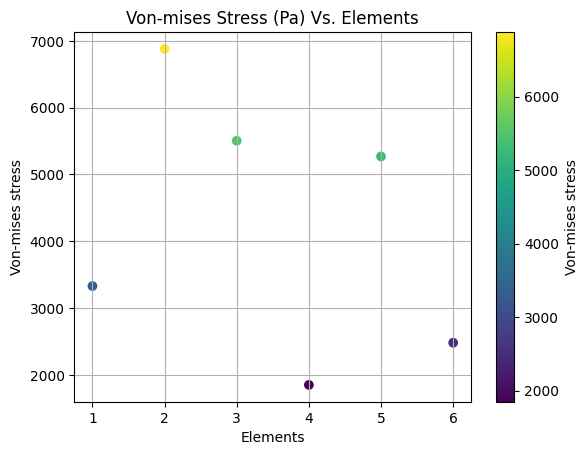

In [13]:
#for getting strain and stress values. It looks wrong :(
strain_store,stress_store,von_mises_store,u_store2 = [],[],[],[]
for elem_idx in range(1,Num_elements+1):
    u_store = []
    #print(u)
    N1 = NCA[elem_idx,1]
    N2 = NCA[elem_idx,2]
    N3 = NCA[elem_idx,3]
    #print(np.round(u[2*N1-2],7),np.round(u[2*N1-1],7),np.round(u[2*N2-2],7),np.round(u[2*N2-1],7),np.round(u[2*N3-2],7),np.round(u[2*N3-1],7))
    #print(N1,N2,N3)
    u_store.append(u[2*N1-2])
    u_store.append(u[2*N1-1])
    u_store.append(u[2*N2-2])
    u_store.append(u[2*N2-1])
    u_store.append(u[2*N3-2])
    u_store.append(u[2*N3-1])
    #print(np.shape(B_store[elem_idx]),np.shape(u_store))
    strain = np.matmul(B_store[elem_idx-1],u_store)
    stress = np.matmul(D_store[elem_idx-1],strain)
    strain_store.append(strain)
    stress_store.append(stress)
    
    print("Strain for element {} = {}".format(elem_idx,strain))
    print("Stress for element {} = {} Pa".format(elem_idx,stress))
    #print("Strain matrices:")
    #print(strain)
    #print("Stress matrices:")
    #print(stress)

    sigma_xx = stress[0]
    sigma_yy = stress[1]
    sigma_xy = stress[2]

    von_mises = np.sqrt((sigma_xx**2+sigma_yy**2-sigma_xx*sigma_yy+3*sigma_xy**2))
    von_mises_store.append(von_mises)
    print("Von-mises stress for element {} = {} Pa \n".format(elem_idx,von_mises))
    u_store2.append(u_store)
#print(np.round(u,10))
#print(np.shape(strain_store),np.shape(stress_store))

plt.grid()
plt.scatter(x=range(1,Num_elements+1), y=von_mises_store, c=von_mises_store)  
plt.colorbar(label="Von-mises stress", orientation="vertical") 
plt.xlabel("Elements")
plt.ylabel("Von-mises stress")
plt.title("Von-mises Stress (Pa) Vs. Elements")
plt.show() 

# 

In [14]:
u_store2

[[-1.0784320787386456e-14,
  2.0000014835175535e-14,
  -3.554076006690605e-08,
  2.3960785892934546e-08,
  1.0784323206947938e-14,
  -4.0000049359034204e-14],
 [-3.554076006690605e-08,
  2.3960785892934546e-08,
  -4.0359888689406174e-08,
  -3.280250852458622e-08,
  1.0784323206947938e-14,
  -4.0000049359034204e-14],
 [-1.3403311538962172e-07,
  -3.756467345640773e-08,
  -4.0359888689406174e-08,
  -3.280250852458622e-08,
  -3.554076006690605e-08,
  2.3960785892934546e-08],
 [-3.554076006690605e-08,
  2.3960785892934546e-08,
  -1.2756390870445134e-07,
  3.042999257810496e-08,
  -1.3403311538962172e-07,
  -3.756467345640773e-08],
 [-3.639483415847535e-08,
  -1.621820174525347e-07,
  -4.0359888689406174e-08,
  -3.280250852458622e-08,
  -1.3403311538962172e-07,
  -3.756467345640773e-08],
 [-1.3403311538962172e-07,
  -3.756467345640773e-08,
  -1.4720445162111755e-07,
  -1.7501068199193753e-07,
  -3.639483415847535e-08,
  -1.621820174525347e-07]]

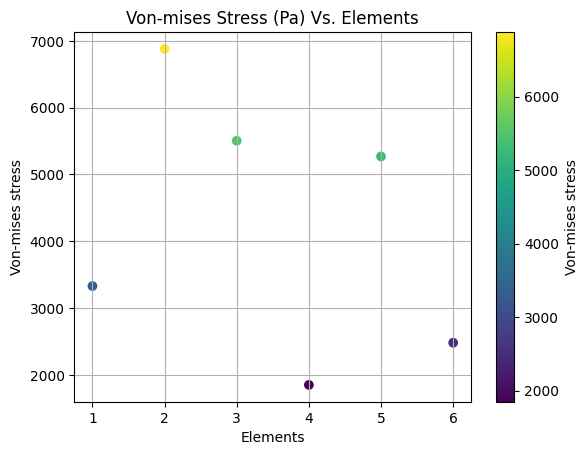

In [15]:
plt.grid()
plt.scatter(x=range(1,Num_elements+1), y=von_mises_store, c=von_mises_store)  
plt.colorbar(label="Von-mises stress", orientation="vertical") 
plt.xlabel("Elements")
plt.ylabel("Von-mises stress")
plt.title("Von-mises Stress (Pa) Vs. Elements")
plt.show() 

In [16]:
F_new

array([ 1.07843128e+03, -2.00000000e+03, -1.07843128e+03,  4.00000000e+03,
        4.54747351e-13,  0.00000000e+00,  1.81898940e-12,  1.81898940e-12,
        4.54747351e-13, -1.00000000e+03,  0.00000000e+00, -4.54747351e-13,
        1.81898940e-12, -1.42108547e-12,  2.27373675e-12, -1.00000000e+03])

In [17]:
u_abs = abs(u)
print(u_abs)

max_u = max((u_abs))
idx = np.where(u_abs == max_u)[0][0]

[1.07843208e-14 2.00000148e-14 1.07843232e-14 4.00000494e-14
 3.55407601e-08 2.39607859e-08 4.03598887e-08 3.28025085e-08
 3.63948342e-08 1.62182017e-07 1.27563909e-07 3.04299926e-08
 1.34033115e-07 3.75646735e-08 1.47204452e-07 1.75010682e-07]
